In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## !git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import sys
print(sys.executable)

C:\Users\Phyo Min Khant\anaconda3\Anaconda3\python.exe


In [5]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.0


In [6]:
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(420.4171, shape=(), dtype=float32)


In [7]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
from tensorflow.keras.preprocessing.image import load_img

In [9]:
path = './clothing-dataset-small/train/hat'
name = '1aac00cd-b42a-40f1-a82a-dcc44a0879d4.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [13]:
X = np.array([x])
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

1/1 [==============================] - 13s 13s/step


In [15]:
decode_predictions(pred)

[[('n02869837', 'bonnet', 0.20651299),
  ('n04599235', 'wool', 0.17120962),
  ('n04254777', 'sock', 0.035498176),
  ('n03188531', 'diaper', 0.030367315),
  ('n03775071', 'mitten', 0.02936845)]]

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds)

In [20]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [21]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [22]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 13s 105ms/step - loss: 1.2065 - accuracy: 0.6793 - val_loss: 0.8191 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 7s 77ms/step - loss: 0.5181 - accuracy: 0.8354 - val_loss: 0.8263 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 7s 77ms/step - loss: 0.3098 - accuracy: 0.8905 - val_loss: 0.9622 - val_accuracy: 0.7742
Epoch 4/10
96/96 [==============================] - 7s 77ms/step - loss: 0.2895 - accuracy: 0.8977 - val_loss: 0.9336 - val_accuracy: 0.7830
Epoch 5/10
96/96 [==============================] - 7s 77ms/step - loss: 0.1787 - accuracy: 0.9368 - val_loss: 0.8969 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 8s 78ms/step - loss: 0.1037 - accuracy: 0.9664 - val_loss: 0.8699 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 7s 75ms/step - loss: 0.0619 - accuracy: 0.9827 - val_loss: 0.8828 - val_accuracy: 0.8006
Epoch 8/10


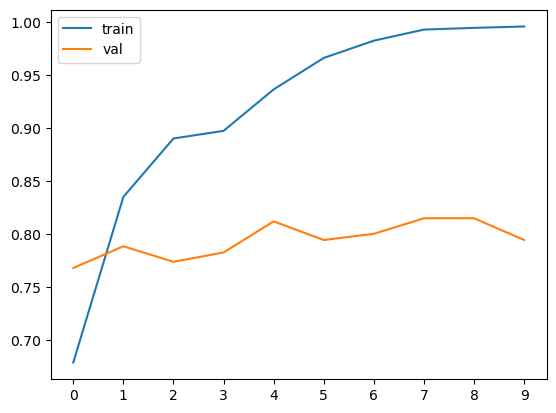

In [24]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [31]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    ###########################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)

    ###########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [26]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 10s 83ms/step - loss: 1.8871 - accuracy: 0.3771 - val_loss: 1.6017 - val_accuracy: 0.4751
Epoch 2/10
96/96 [==============================] - 7s 77ms/step - loss: 1.3791 - accuracy: 0.5561 - val_loss: 1.2650 - val_accuracy: 0.6129
Epoch 3/10
96/96 [==============================] - 7s 74ms/step - loss: 1.1451 - accuracy: 0.6343 - val_loss: 1.0883 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 7s 74ms/step - loss: 1.0074 - accuracy: 0.6754 - val_loss: 0.9796 - val_accuracy: 0.6891
Epoch 5/10
96/96 [==============================] - 7s 74ms/step - loss: 0.9149 - accuracy: 0.6998 - val_loss: 0.9029 - val_accuracy: 0.7302
Epoch 6/10
96/96 [==============================] - 7s 74ms/step - loss: 0.8456 - accuracy: 0.7233 - val_loss: 0.8477 - val_accuracy: 0.7302
Epoch 7/10
96/96 [==============================] - 7s 74ms/step - loss: 0.7920 - accuracy: 0.7399 - val_loss: 0.8067 - val_accuracy: 0.7566
Epoch

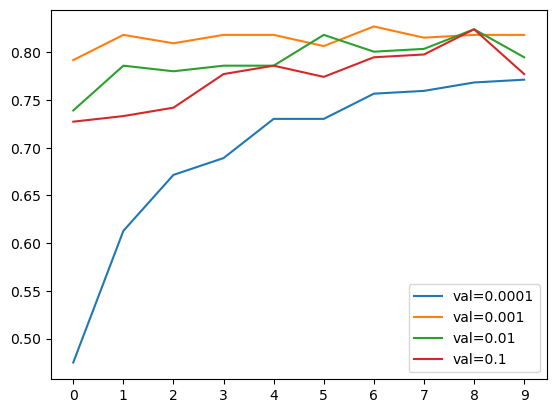

In [27]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
#model.save_weights('model_v1.h5', save_format='h5')

In [28]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)
    

In [30]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 10s 90ms/step - loss: 1.0961 - accuracy: 0.6353 - val_loss: 0.7298 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 8s 81ms/step - loss: 0.6302 - accuracy: 0.7846 - val_loss: 0.6291 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 8s 79ms/step - loss: 0.5066 - accuracy: 0.8318 - val_loss: 0.5794 - val_accuracy: 0.8211
Epoch 4/10
96/96 [==============================] - 7s 76ms/step - loss: 0.4383 - accuracy: 0.8576 - val_loss: 0.5612 - val_accuracy: 0.8211
Epoch 5/10
96/96 [==============================] - 7s 77ms/step - loss: 0.3732 - accuracy: 0.8823 - val_loss: 0.5571 - val_accuracy: 0.8270
Epoch 6/10
96/96 [==============================] - 9s 98ms/step - loss: 0.3301 - accuracy: 0.9042 - val_loss: 0.5441 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 17s 180ms/step - loss: 0.2884 - accuracy: 0.9267 - val_loss: 0.5234 - val_accuracy: 0.8328
Epoch 8/10

In [34]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 26s 212ms/step - loss: 1.2265 - accuracy: 0.5935 - val_loss: 0.8533 - val_accuracy: 0.6979
Epoch 2/10
96/96 [==============================] - 19s 200ms/step - loss: 0.7408 - accuracy: 0.7480 - val_loss: 0.7157 - val_accuracy: 0.7478
Epoch 3/10
96/96 [==============================] - 20s 204ms/step - loss: 0.5845 - accuracy: 0.8070 - val_loss: 0.6277 - val_accuracy: 0.7918
Epoch 4/10
96/96 [==============================] - 20s 207ms/step - loss: 0.4910 - accuracy: 0.8413 - val_loss: 0.6047 - val_accuracy: 0.7918
Epoch 5/10
96/96 [==============================] - 20s 210ms/step - loss: 0.4148 - accuracy: 0.8729 - val_loss: 0.5939 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 21s 217ms/step - loss: 0.3605 - accuracy: 0.8934 - val_loss: 0.6199 - val_accuracy: 0.7801
Epoch 7/10
96/96 [==============================] - 22s 233ms/step - loss: 0.3159 - accuracy: 0.9107 - val_loss: 0.5553 - val_accuracy: 0.8

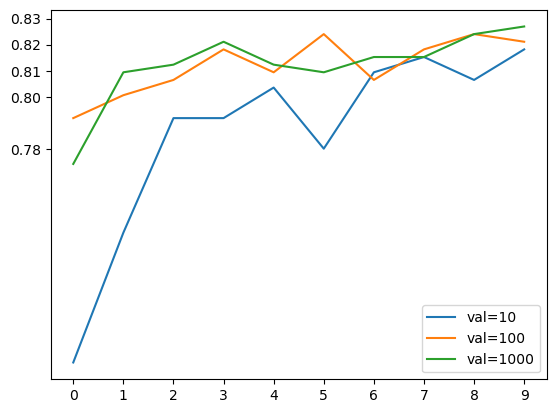

In [36]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.8, 0.81, 0.82, 0.83])
plt.legend()

In [37]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.2):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    ###########################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)

    ###########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [42]:
learning_rate = 0.001
size = 100
scores = {}

for droprate in [0.0, 0.2, 0.5]:
    print(droprate)

    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 25s 205ms/step - loss: 0.9500 - accuracy: 0.6763 - val_loss: 0.6382 - val_accuracy: 0.7859
Epoch 2/30
96/96 [==============================] - 18s 188ms/step - loss: 0.5039 - accuracy: 0.8233 - val_loss: 0.5490 - val_accuracy: 0.8240
Epoch 3/30
96/96 [==============================] - 19s 194ms/step - loss: 0.3597 - accuracy: 0.8726 - val_loss: 0.5685 - val_accuracy: 0.8211
Epoch 4/30
96/96 [==============================] - 20s 206ms/step - loss: 0.2533 - accuracy: 0.9247 - val_loss: 0.5196 - val_accuracy: 0.8240
Epoch 5/30
96/96 [==============================] - 19s 200ms/step - loss: 0.1681 - accuracy: 0.9619 - val_loss: 0.5710 - val_accuracy: 0.8182
Epoch 6/30
96/96 [==============================] - 19s 195ms/step - loss: 0.1244 - accuracy: 0.9723 - val_loss: 0.6322 - val_accuracy: 0.8182
Epoch 7/30
96/96 [==============================] - 18s 190ms/step - loss: 0.0872 - accuracy: 0.9840 - val_loss: 0.6304 - val_accuracy: 0.

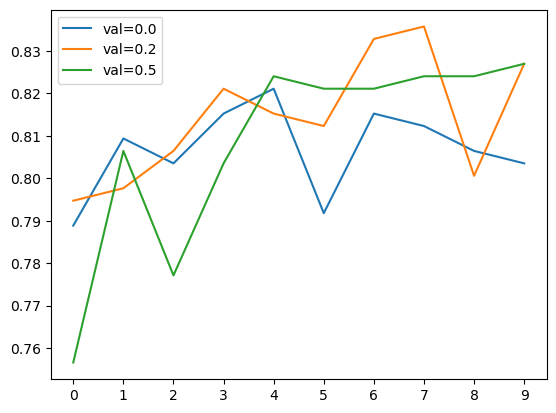

In [41]:
for droprate, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.xticks(np.arange(10))
plt.legend()

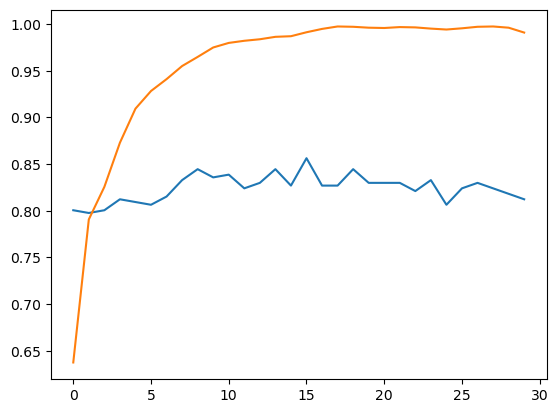

In [43]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=('val=%s' %droprate))
plt.plot(hist['accuracy'], label=('val=%s' %droprate))

In [44]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [45]:
learning_rate = 0.001
size = 100
droprate=0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size, 
    droprate=droprate
)
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 59s 557ms/step - loss: 1.3127 - accuracy: 0.5603 - val_loss: 0.7979 - val_accuracy: 0.7390
Epoch 2/50
96/96 [==============================] - 49s 506ms/step - loss: 0.8708 - accuracy: 0.7073 - val_loss: 0.7107 - val_accuracy: 0.7625
Epoch 3/50
96/96 [==============================] - 47s 484ms/step - loss: 0.7960 - accuracy: 0.7262 - val_loss: 0.7201 - val_accuracy: 0.7273
Epoch 4/50
96/96 [==============================] - 51s 529ms/step - loss: 0.7050 - accuracy: 0.7572 - val_loss: 0.6242 - val_accuracy: 0.7947
Epoch 5/50
96/96 [==============================] - 48s 497ms/step - loss: 0.6297 - accuracy: 0.7894 - val_loss: 0.6535 - val_accuracy: 0.7654
Epoch 6/50
96/96 [==============================] - 49s 510ms/step - loss: 0.6057 - accuracy: 0.7894 - val_loss: 0.6430 - val_accuracy: 0.7742
Epoch 7/50
96/96 [==============================] - 51s 529ms/step - loss: 0.5426 - accuracy: 0.8093 - val_loss: 0.7008 - val_accuracy: 0.7625

KeyboardInterrupt: 

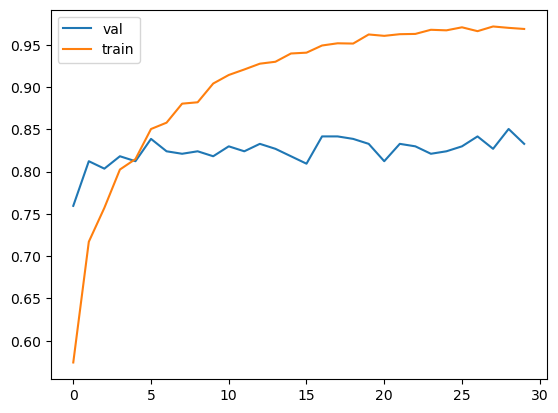

In [46]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [20]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [21]:
input_size = 299

In [22]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [23]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [24]:

learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
10/96 [==>...........................] - ETA: 1:14 - loss: 2.0047 - accuracy: 0.3063

KeyboardInterrupt: 

In [25]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [27]:
model = keras.models.load_model('xception_v4_1_06_0.889.h5')

In [28]:
model.evaluate(test_ds)

12/12 [==============================] - 5s 319ms/step - loss: 0.2762 - accuracy: 0.9032


[0.2762073278427124, 0.9032257795333862]

In [64]:
path ='th (3).jpg'

In [65]:
img = load_img(path, target_size=(299, 299))

In [66]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [67]:
X = preprocess_input(X)

In [68]:
pred = model.predict(X)

1/1 [==============================] - 0s 32ms/step


In [69]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [70]:
dict(zip(classes, pred[0]))

{'dress': 0.09670349,
 'hat': 0.22212428,
 'longsleeve': -2.330036,
 'outwear': -0.9740344,
 'pants': -1.8793684,
 'shirt': -2.1348362,
 'shoes': 7.505035,
 'shorts': -1.7344835,
 'skirt': -1.5889235,
 't-shirt': -1.2539692}